# Loan Default Prediction

Financial inclusion has expanded access to banking services. 

In deciding who to lend to, banks need to assess these borrowers based on traits and historical performance of their previous borrowings. This type of assessment is captured in the C's of credit. 

In [1]:
import pandas as pd

data = pd.read_csv('Default_Fin.csv')

In [2]:
data.head(4)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0


In [3]:
data.tail(7)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9993,9994,1,11266.08,679601.40,0
9994,9995,0,2068.92,179471.28,0
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [4]:
data.describe

<bound method NDFrame.describe of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]>

In [5]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
data.shape

(10000, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [8]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [9]:
for x in data.columns:
    print(x)

Index
Employed
Bank Balance
Annual Salary
Defaulted?


In [10]:
# find out quantity which defaulted
# code was wirtten this way because the '?' is an object in python
data[data['Defaulted?']==1].value_counts()

Index  Employed  Bank Balance  Annual Salary  Defaulted?
137    0         17844.00      214252.80      1             1
6783   1         22173.48      362434.20      1             1
6687   0         21667.44      230016.36      1             1
6644   0         22743.96      196734.12      1             1
6635   1         17209.56      567738.36      1             1
                                                           ..
3212   1         18946.20      734641.56      1             1
3190   1         26741.64      329260.20      1             1
3182   1         21016.20      460579.08      1             1
3163   0         28983.84      209154.00      1             1
9979   1         26429.52      567447.12      1             1
Length: 333, dtype: int64

In [11]:
#rename column Defaulted? -> Defaulted
data.rename(columns={'Defaulted?' : 'Defaulted'}, inplace=True)

In [12]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted'], dtype='object')

In [13]:
#we don't need the index loaded with the csv
data.drop('Index',axis=1,inplace=True)
data.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0


## Selected Target

In [14]:
y= data.Defaulted

In [15]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Defaulted, dtype: int64

In [16]:
## Select Features - long method:
#feature_columns = ['Employed', 'Bank Balance', 'Annual Salary']
#X = data[feature_columns]

In [17]:
#TODO: use other columns as features except Defaulted column
X = data.drop('Defaulted',axis=1)

In [18]:
X.head(2)

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56


## Create train and test datasets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [21]:
y_test.value_counts()

0    2898
1     102
Name: Defaulted, dtype: int64

In [22]:
print('\n X_train: \n',X_train.head(2))
print('\n X_test: \n',X_test.head(2))
print('\n y_train: \n',y_train.head(2))
print('\n y_test: \n',y_test.head(2))


 X_train: 
      Employed  Bank Balance  Annual Salary
456         1      12882.00      537169.32
556         1      14558.88      541794.24

 X_test: 
       Employed  Bank Balance  Annual Salary
5154         1      16729.56      515052.24
4737         1      12074.40      512271.24

 y_train: 
 456    0
556    0
Name: Defaulted, dtype: int64

 y_test: 
 5154    0
4737    0
Name: Defaulted, dtype: int64


In [23]:
X_train.shape

(7000, 3)

## Train Your Classification Model With A Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DT_model = DecisionTreeClassifier(random_state=1)

In [26]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
#create your predictions
DT_preds = DT_model.predict(X_test)

In [28]:
print('\n y: \n',y.head(4))
print('\n DT_preds: \n',DT_preds[:4])


 y: 
 0    0
1    0
2    0
3    0
Name: Defaulted, dtype: int64

 DT_preds: 
 [0 0 0 1]


## Score Your Decision Tree Model

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(DT_preds,y_test))

0.9553333333333334


## 96%

## Train Your Classification Model With A Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RF_model = RandomForestClassifier()


In [34]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
RF_preds = RF_model.predict(X_test)

## Score Your Random Forest Model

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print(accuracy_score(RF_preds,y_test))

0.971


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

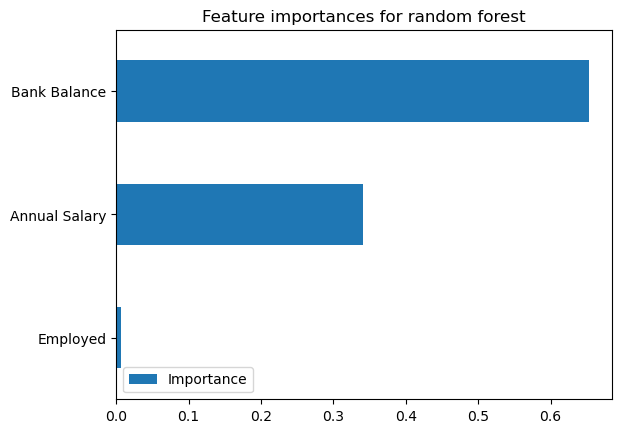

In [39]:
#get feature importances
RF_importances = pd.DataFrame(data = RF_model.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top feature importances, sorted
RF_importances[:3].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

### What is the accuracy score of your random forest model?

## 97%

## Train Classification model with a KNeighbor classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KN_model = KNeighborsClassifier(n_neighbors = 5)

In [42]:
KN_model.fit(X_train, y_train)

KNeighborsClassifier()

## Score your KNeighbor model

In [43]:
KN_preds = KN_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

In [45]:
print(accuracy_score(KN_preds, y_test))

0.966


In [46]:
print(classification_report(KN_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2972
           1       0.14      0.50      0.22        28

    accuracy                           0.97      3000
   macro avg       0.57      0.74      0.60      3000
weighted avg       0.99      0.97      0.98      3000



## breaking down classification report

In [47]:
# Precision:
from sklearn.metrics import precision_score

print('Precision Score: {}'.format(precision_score(KN_preds, y_test)))

Precision Score: 0.13725490196078433


In [48]:
# Recall:
from sklearn.metrics import recall_score

print('Recall Score: {}'.format(recall_score(KN_preds, y_test)))

Recall Score: 0.5


In [49]:
# f1 score:

from sklearn.metrics import f1_score

print('F1 Score: {}'.format(f1_score(KN_preds, y_test)))

F1 Score: 0.21538461538461542


# Train Classification model with Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
LR_model = LogisticRegression()

In [52]:
LR_model.fit(X_train, y_train)

LogisticRegression()

# Score your logistic regression model

In [53]:
LR_preds = LR_model.predict(X_test)

In [54]:
print(accuracy_score(LR_preds, y_test))

0.9656666666666667


# Looking at Classification Report analysis ; Performance Evaluation Metrics

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2999
           1       0.00      0.00      0.00         1

    accuracy                           0.97      3000
   macro avg       0.50      0.48      0.49      3000
weighted avg       1.00      0.97      0.98      3000

